In [1]:
import timeit
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray
from geocube.api.core import make_geocube

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


## Load in vector and raster data

In [2]:
data_path = "../data/level_1_2_merged.gpkg"
#data_path = "../data/level_1_2_merged_higher_resolution.gpkg"
#data_path = "../data/level_1_2_merged_no_simplification.gpkg"
world = gpd.read_file(data_path)
world.head()


,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,VARNAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.1_1,Baharak,NA,NA,Wuleswali,District,NA,AF.BD.BA,None,None,None,None,None,None,"POLYGON ((71.41149 36.55717, 71.36436 36.55226..."
1,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.2_1,Darwaz,NA,NA,Wuleswali,District,NA,AF.BD.DA,None,None,None,None,None,None,"POLYGON ((71.27620 38.00465, 71.25337 38.01428..."
2,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.3_1,Fayzabad,NA,NA,Wuleswali,District,NA,AF.BD.FA,None,None,None,None,None,None,"POLYGON ((70.78272 37.27678, 70.82961 37.21140..."
3,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.4_1,Ishkashim,NA,NA,Wuleswali,District,NA,AF.BD.IK,None,None,None,None,None,None,"POLYGON ((71.45571 36.53777, 71.29496 36.61458..."
4,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.5_1,Jurm,NA,NA,Wuleswali,District,NA,AF.BD.JU,None,None,None,None,None,None,"POLYGON ((70.71236 37.07621, 70.75385 37.05461..."


In [3]:
world["polygon_id"] = world.index.values
world.head()


,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,CC_2,HASC_2,VARNAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,polygon_id
0,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.1_1,Baharak,NA,NA,Wuleswali,...,NA,AF.BD.BA,None,None,None,None,None,None,"POLYGON ((71.41149 36.55717, 71.36436 36.55226...",0
1,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.2_1,Darwaz,NA,NA,Wuleswali,...,NA,AF.BD.DA,None,None,None,None,None,None,"POLYGON ((71.27620 38.00465, 71.25337 38.01428...",1
2,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.3_1,Fayzabad,NA,NA,Wuleswali,...,NA,AF.BD.FA,None,None,None,None,None,None,"POLYGON ((70.78272 37.27678, 70.82961 37.21140...",2
3,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.4_1,Ishkashim,NA,NA,Wuleswali,...,NA,AF.BD.IK,None,None,None,None,None,None,"POLYGON ((71.45571 36.53777, 71.29496 36.61458...",3
4,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.5_1,Jurm,NA,NA,Wuleswali,...,NA,AF.BD.JU,None,None,None,None,None,None,"POLYGON ((70.71236 37.07621, 70.75385 37.05461...",4


In [4]:
world.tail()


,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,CC_2,HASC_2,VARNAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,polygon_id
47852,ZNC,Northern Cyprus,ZNC.1_1,Gazimağusa,Αμμόχωστος,ZNC.1_1,None,None,None,None,...,None,None,Famagusta|Gazimagusa,Kaza,District,NA,NA,NA,"POLYGON ((33.90652 35.06912, 33.92147 35.08070...",47852
47853,ZNC,Northern Cyprus,ZNC.2_1,Girne,Κερύvεια,ZNC.2_1,None,None,None,None,...,None,None,Kyrenia,Kaza,District,NA,NA,NA,"MULTIPOLYGON (((33.65903 35.36458, 33.65671 35...",47853
47854,ZNC,Northern Cyprus,ZNC.3_1,Güzelyurt,NA,ZNC.3_1,None,None,None,None,...,None,None,Morphou,Kaza,District,NA,NA,NA,"MULTIPOLYGON (((33.13405 35.17330, 33.10912 35...",47854
47855,ZNC,Northern Cyprus,ZNC.4_1,Iskele,NA,ZNC.4_1,None,None,None,None,...,None,None,Trikomo,Kaza,District,NA,NA,NA,"MULTIPOLYGON (((34.60431 35.71014, 34.60375 35...",47855
47856,ZNC,Northern Cyprus,ZNC.5_1,Nicosia,Λευκωσία,ZNC.5_1,None,None,None,None,...,None,None,Lefkosa,Kaza,District,NA,NA,NA,"POLYGON ((33.66292 35.03827, 33.63643 35.03156...",47856


In [5]:
world.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

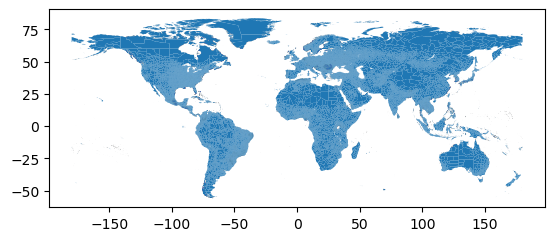

In [6]:
world.plot()
plt.show()


In [7]:
raster_path = "../data/prob_extr_drought_GFDL-ESM4_2020-2040.tif"
drought = rioxarray.open_rasterio(raster_path, default_name="drought")


In [8]:
drought


<xarray.DataArray 'drought' (band: 1, y: 600, x: 1440)>
[864000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * y            (y) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [9]:
drought.data


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [10]:
min_drought = drought.min(skipna=True).data
max_drought = drought.max(skipna=True).data
print(min_drought, max_drought)


0.0 0.8968254


In [11]:
drought


<xarray.DataArray 'drought' (band: 1, y: 600, x: 1440)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * y            (y) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

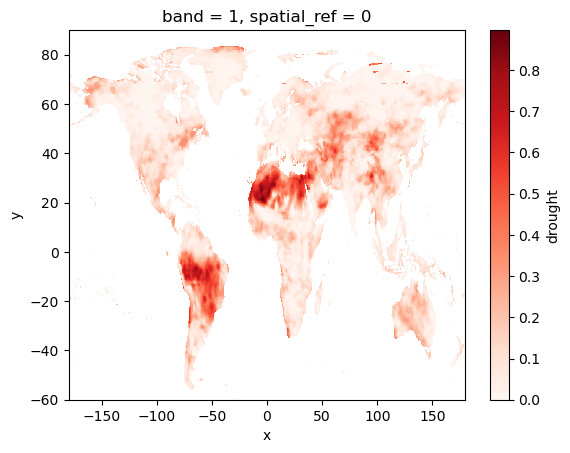

In [12]:
drought.plot(cmap="Reds", vmin=min_drought, vmax=max_drought)
plt.show()


## Creating the burned raster

In [13]:
gdf = world
data = drought
load_data = True
interp = None

start = timeit.default_timer()
#---------------------------------------------------------------------------

# Clip to the external bounds of the input geometry
minx, miny, maxx, maxy = gdf.total_bounds
data = data.sel(x=slice(minx, maxx), y=slice(miny, maxy))

# Interpolate to a finer grid first
if interp is not None and interp > 1:
    new_x  = np.linspace( data.x[0], data.x[-1], int(len(data.x) * interp) )
    new_y  = np.linspace( data.y[0], data.y[-1], int(len(data.y) * interp) )
    data = data.interp( x = new_x, y = new_y, method='nearest' )

# Load data to disk before analysis (much quicker).
if load_data:
    data = data.load()

# Burn polygon indices ('index' in dataframe ) onto same raster as data
burned = make_geocube( vector_data = gdf,
                       measurements = ["polygon_id"],
                       like = data )

# Get indices of rasters that successfully burned (some will have been too small)
#success_idx = np.unique( burned.polygon_id ).astype(int) # this line will convert float nan to 0, which seems like a bug
success_idx = np.array([int(success) for success in np.unique( burned.polygon_id ).tolist() if np.isnan(success) == False])
success_idx = success_idx[ success_idx >=0 ]

#---------------------------------------------------------------------------
end = timeit.default_timer()
print(f"Time to complete: {(end - start):.5f}s")


Time to complete: 5.79626s


In [14]:
print(len(success_idx))
print(len(gdf))


27806
47857


So about 20k polygons are too small.

In [15]:
burned


<xarray.Dataset>
Dimensions:      (y: 559, x: 1440)
Coordinates:
  * y            (y) float64 -55.88 -55.62 -55.38 -55.12 ... 83.12 83.38 83.62
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    spatial_ref  int64 0
Data variables:
    polygon_id   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

## Zonal stats

In [16]:
skipna = True

# Group together the raster data by polygon index
data['polygon_id'] = (['y','x'], burned.polygon_id.values )
polygon_groups = data.groupby('polygon_id')
print(polygon_groups)


DataArrayGroupBy, grouped over 'polygon_id'
27806 groups with labels 0.0, 1.0, ..., 4.786e+04.


In [17]:
burned.polygon_id.values


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [18]:
# Get statistics for burned raster analysis
gdf_stats = gdf[['geometry']]
gdf_stats['polygon_mean'] = np.zeros( len(gdf) ) 
gdf_stats['polygon_count'] = np.zeros( len(gdf) ) 
gdf_stats['polygon_std'] = np.zeros( len(gdf) ) 

gdf_stats.head()


,geometry,polygon_mean,polygon_count,polygon_std
0,"POLYGON ((71.41149 36.55717, 71.36436 36.55226...",0.0,0.0,0.0
1,"POLYGON ((71.27620 38.00465, 71.25337 38.01428...",0.0,0.0,0.0
2,"POLYGON ((70.78272 37.27678, 70.82961 37.21140...",0.0,0.0,0.0
3,"POLYGON ((71.45571 36.53777, 71.29496 36.61458...",0.0,0.0,0.0
4,"POLYGON ((70.71236 37.07621, 70.75385 37.05461...",0.0,0.0,0.0


In [19]:
gdf_stats.tail()


,geometry,polygon_mean,polygon_count,polygon_std
47852,"POLYGON ((33.90652 35.06912, 33.92147 35.08070...",0.0,0.0,0.0
47853,"MULTIPOLYGON (((33.65903 35.36458, 33.65671 35...",0.0,0.0,0.0
47854,"MULTIPOLYGON (((33.13405 35.17330, 33.10912 35...",0.0,0.0,0.0
47855,"MULTIPOLYGON (((34.60431 35.71014, 34.60375 35...",0.0,0.0,0.0
47856,"POLYGON ((33.66292 35.03827, 33.63643 35.03156...",0.0,0.0,0.0


In [20]:
print(len(success_idx))
print(len(gdf_stats))


27806
47857


In [21]:
start = timeit.default_timer()
#---------------------------------------------------------------------------

gdf_stats.polygon_mean.loc[success_idx] = polygon_groups.mean( skipna = skipna ).values.squeeze()
gdf_stats.polygon_count.loc[success_idx] = polygon_groups.count( ).values.squeeze()
gdf_stats.polygon_std.loc[success_idx] = polygon_groups.std( skipna = skipna ).values.squeeze()

# For missing rows (polygon too small) interpolate to centroids
missing_idx = np.array( [ ii for ii in gdf.polygon_id.values if ii not in success_idx ] )

cent = gdf.loc[missing_idx].geometry.centroid
cent_x = [cc.x for cc in cent]
cent_y = [cc.y for cc in cent]
data_cent = data.interp( x = xr.DataArray( cent_x ), 
                         y = xr.DataArray( cent_y ) )

gdf_stats['polygon_mean'][missing_idx] = data_cent.values.squeeze()

#---------------------------------------------------------------------------
end = timeit.default_timer()
print(f"Time to complete: {(end - start):.5f}s")


Time to complete: 9.89952s


In [22]:
gdf_stats


,geometry,polygon_mean,polygon_count,polygon_std
0,"POLYGON ((71.41149 36.55717, 71.36436 36.55226...",0.170635,5.0,0.030012
1,"POLYGON ((71.27620 38.00465, 71.25337 38.01428...",0.173016,5.0,0.020635
2,"POLYGON ((70.78272 37.27678, 70.82961 37.21140...",0.199206,5.0,0.014720
3,"POLYGON ((71.45571 36.53777, 71.29496 36.61458...",0.146825,3.0,0.016200
4,"POLYGON ((70.71236 37.07621, 70.75385 37.05461...",0.125000,4.0,0.018718
...,...,...,...,...
47852,"POLYGON ((33.90652 35.06912, 33.92147 35.08070...",0.303571,2.0,0.009921
47853,"MULTIPOLYGON (((33.65903 35.36458, 33.65671 35...",0.295433,0.0,0.000000
47854,"MULTIPOLYGON (((33.13405 35.17330, 33.10912 35...",0.309524,1.0,0.000000
47855,"MULTIPOLYGON (((34.60431 35.71014, 34.60375 35...",0.295635,2.0,0.001984


In [23]:
min_drought_mean, max_drought_mean = gdf_stats.polygon_mean.min(), gdf_stats.polygon_mean.max()
print(min_drought_mean, max_drought_mean)


0.0 0.7797619104385376


Now let's see how the original raster data compares with our new vector dataset.

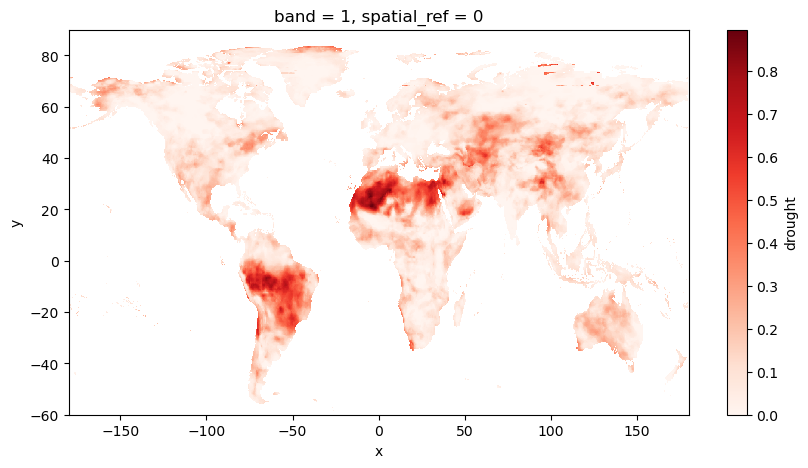

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
drought.plot(cmap="Reds", vmin=min_drought, vmax=max_drought, ax=ax)
plt.show()


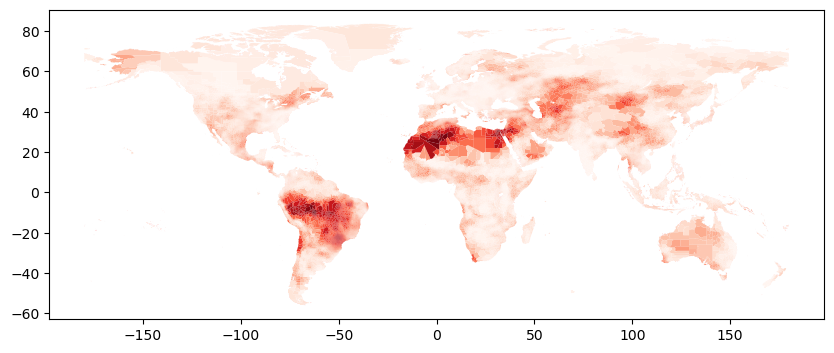

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
gdf_stats.plot(column="polygon_mean", cmap="Reds", vmin=min_drought_mean, vmax=max_drought_mean, ax=ax)
plt.show()


In [26]:
np.sum(np.isnan(gdf_stats.polygon_mean))


1210

In [27]:
world[np.isnan(gdf_stats.polygon_mean)]


,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,CC_2,HASC_2,VARNAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,polygon_id
420,AGO,Angola,AGO.11_1,Luanda,NA,AGO.11.2_1,Cazenga,NA,NA,Município,...,1105,AO.LU.CZ,None,None,None,None,None,None,"POLYGON ((13.32184 -8.81886, 13.32050 -8.85369...",420
421,AGO,Angola,AGO.11_1,Luanda,NA,AGO.11.3_1,Ingombota,NA,NA,Município,...,1101,AO.LU.IN,None,None,None,None,None,None,"POLYGON ((13.26867 -8.79940, 13.23851 -8.83129...",421
423,AGO,Angola,AGO.11_1,Luanda,NA,AGO.11.5_1,Maianga,NA,NA,Município,...,1102,AO.LU.MA,None,None,None,None,None,None,"POLYGON ((13.25966 -8.83696, 13.19900 -8.89188...",423
424,AGO,Angola,AGO.11_1,Luanda,NA,AGO.11.6_1,Rangel,NA,NA,Município,...,1103,AO.LU.RA,None,None,None,None,None,None,"POLYGON ((13.27703 -8.84495, 13.24350 -8.82758...",424
426,AGO,Angola,AGO.11_1,Luanda,NA,AGO.11.8_1,Sambizanga,NA,NA,Município,...,1104,AO.LU.SZ,None,None,None,None,None,None,"POLYGON ((13.27810 -8.79838, 13.27115 -8.81709...",426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47845,VGB,British Virgin Islands,VGB.1_1,Anegada,NA,VGB.1_1,None,None,None,None,...,None,None,NA,District,District,NA,NA,NA,"POLYGON ((-64.33403 18.74958, -64.29569 18.730...",47845
47846,VGB,British Virgin Islands,VGB.2_1,Jost Van Dyke,NA,VGB.2_1,None,None,None,None,...,None,None,NA,District,District,NA,NA,NA,"MULTIPOLYGON (((-64.71098 18.43681, -64.70625 ...",47846
47847,VGB,British Virgin Islands,VGB.3_1,Other Islands,NA,VGB.3_1,None,None,None,None,...,None,None,NA,District,District,NA,NA,NA,"MULTIPOLYGON (((-64.46902 18.39292, -64.47180 ...",47847
47848,VGB,British Virgin Islands,VGB.4_1,Tortola,NA,VGB.4_1,None,None,None,None,...,None,None,NA,District,District,NA,NA,NA,"MULTIPOLYGON (((-64.50097 18.47097, -64.50625 ...",47848


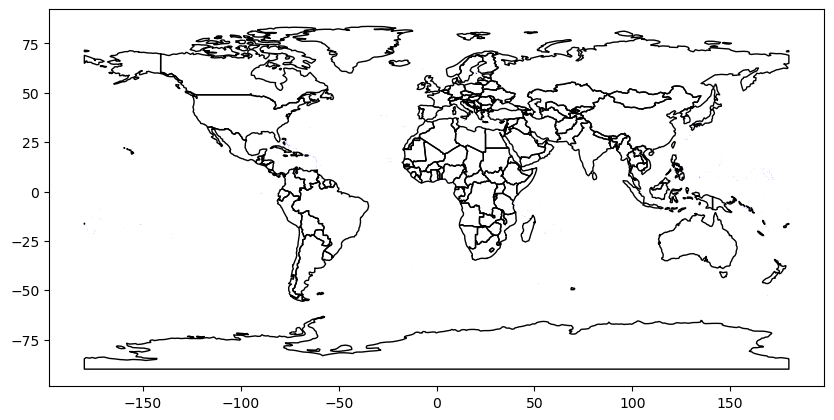

In [28]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(10, 7))
countries.plot(facecolor="None", edgecolor="black", ax=ax)
world[np.isnan(gdf_stats.polygon_mean)].plot(color="blue", ax=ax)
plt.show()


It is difficult to see, but for many very small polygons (almost, but not all, islands), this method does not work well. This could be a function of how coarse the underlying raster data is, or of the burn-in method itself. If you zoom in, you can see that these small polygons are colored in blue. The following printouts show which countries these polygons are apart of (according to GADM).

In [29]:
np.unique(world[np.isnan(gdf_stats.polygon_mean)].COUNTRY)


array(['Algeria', 'American Samoa', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Bahamas',
       'Bahrain', 'Barbados', 'Benin', 'Bermuda',
       'Bonaire, Sint Eustatius and Saba', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Cabo Verde', 'Cayman Islands',
       'Colombia', 'Comoros', 'Cook Islands', 'Croatia', 'Cuba',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Faroe Islands',
       'Fiji', 'French Guiana', 'French Polynesia',
       'French Southern Territories', 'Gambia', 'Ghana', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guyana',
       'Honduras', 'Iceland', 'India', 'Indonesia', 'Iran', 'Isle of Man',
       'Japan', 'Jersey', 'Kenya', 'Lebanon', 'Liberia', 'Lithuania',
       'Malaysia', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritius',
       'Mayotte', 'Micronesia', 'Montserrat', 'Morocco', 'México',
       'Nauru', 'N

In [30]:
gdf_stats = gdf_stats.join(world.GID_2)
gdf_stats


,geometry,polygon_mean,polygon_count,polygon_std,GID_2
0,"POLYGON ((71.41149 36.55717, 71.36436 36.55226...",0.170635,5.0,0.030012,AFG.1.1_1
1,"POLYGON ((71.27620 38.00465, 71.25337 38.01428...",0.173016,5.0,0.020635,AFG.1.2_1
2,"POLYGON ((70.78272 37.27678, 70.82961 37.21140...",0.199206,5.0,0.014720,AFG.1.3_1
3,"POLYGON ((71.45571 36.53777, 71.29496 36.61458...",0.146825,3.0,0.016200,AFG.1.4_1
4,"POLYGON ((70.71236 37.07621, 70.75385 37.05461...",0.125000,4.0,0.018718,AFG.1.5_1
...,...,...,...,...,...
47852,"POLYGON ((33.90652 35.06912, 33.92147 35.08070...",0.303571,2.0,0.009921,ZNC.1_1
47853,"MULTIPOLYGON (((33.65903 35.36458, 33.65671 35...",0.295433,0.0,0.000000,ZNC.2_1
47854,"MULTIPOLYGON (((33.13405 35.17330, 33.10912 35...",0.309524,1.0,0.000000,ZNC.3_1
47855,"MULTIPOLYGON (((34.60431 35.71014, 34.60375 35...",0.295635,2.0,0.001984,ZNC.4_1


In [31]:
# fig = px.choropleth(
#     gdf_stats, geojson=world.__geo_interface__, 
#     locations='GID_2', # locations in df
#     featureidkey="properties.GID_2", # matching key in geojson
#     color='polygon_mean',
#     color_continuous_scale="Reds",
#     range_color=(0, gdf_stats.polygon_mean.max()),
#     labels={'polygon_mean':'drought idx'}
# )

# fig.update_geos(projection_type="orthographic", 
#                 #projection_rotation_lat=30, projection_rotation_lon=270, # us focs
#                 projection_rotation_lat=10, projection_rotation_lon=320, #atlantic ocean focus
#                 showocean=True, oceancolor="#1F1F1F")

# fig.update_layout(height=500,
#                   width=1000,
#                   margin={"r":0,"t":0,"l":0,"b":0}, 
#                   template="plotly_dark",
#                  )

# fig.update_traces(marker_line_color="#ffffff", marker_line_width=0)
# fig.update_traces(
#     marker_line_width=0
# )

# fig['layout']['geo']['subunitcolor'] = 'rgba(0,0,0,0)'

# fig.show()


The map above looks great! It is commented out, though, because it makes the Notebook too large to upload to GitHub. The real problem is that it that it is really slow to render. Now we are going to export this data so that we can use it in an app that uses Python Shiny and Mapbox.

## Creating a colormap for future use
We are going to create a custom colormap and then map those colors to each value in our `gds_stats` dataframe. This makes it easy to read in colors for each geometry in Mapbox.

In [32]:
norm = cm.colors.Normalize(vmin=min_drought_mean, vmax=max_drought_mean)
cmap = cm.Reds

def rgba2hex(value, normalizer, colormap):
    rgba = np.array(colormap(normalizer(value), bytes=True))
    hex = cm.colors.to_hex(rgba / 255.)
    return hex

gdf_stats['color'] = gdf_stats.apply(lambda row: rgba2hex(row.polygon_mean, norm, cmap), axis = 1)
gdf_stats.head()


,geometry,polygon_mean,polygon_count,polygon_std,GID_2,color
0,"POLYGON ((71.41149 36.55717, 71.36436 36.55226...",0.170635,5.0,0.030012,AFG.1.1_1,#fcc3ac
1,"POLYGON ((71.27620 38.00465, 71.25337 38.01428...",0.173016,5.0,0.020635,AFG.1.2_1,#fcc3ac
2,"POLYGON ((70.78272 37.27678, 70.82961 37.21140...",0.199206,5.0,0.014720,AFG.1.3_1,#fcb99f
3,"POLYGON ((71.45571 36.53777, 71.29496 36.61458...",0.146825,3.0,0.016200,AFG.1.4_1,#fccdb9
4,"POLYGON ((70.71236 37.07621, 70.75385 37.05461...",0.125000,4.0,0.018718,AFG.1.5_1,#fdd5c3


In [33]:
# with open("../data/stats_with_colors.json", "w") as file:
#   file.write(gdf_stats.to_json())

# with open("..map_app/stats_with_colors.json", "w") as file:
#   file.write(gdf_stats.to_json())
